<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/homework/Lesson_15(12)%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D0%BB%D0%BE%D1%81%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на архив с аудиозаписями [archive](https://drive.google.com/file/d/1QyfUZihJhVjM326EwJ9lm8oeTno2YgyI/view?usp=sharing). Скачать, распаковать, поместить к себе на гугл-диск в папку audio.

### Воспроизведение аудиофайлов

In [ ]:
from IPython.display import Audio

# воспроизведем аудио
Audio('/content/drive/MyDrive/audio/manager.mp3')

### Получение параметров аудио

In [ ]:
# установка библиотеки pydub
!pip install pydub

In [ ]:
from pydub import AudioSegment

# чтение из файла любого формата
music = AudioSegment.from_file(file='/content/drive/MyDrive/audio/manager.mp3',
                               format='mp3')

# продолжительность аудио (секунды)
print(music.duration_seconds)

# частота дискретизаци
print(music.frame_rate)

# количество каналов
print(music.channels)

25.0
16000
2


### Обрезка аудио

In [ ]:
# чтение из файла любого формата
debaty = AudioSegment.from_file(file='/content/drive/MyDrive/audio/debaty.mp3',
                               format='mp3')

# выведем параметры
print(debaty.duration_seconds)
print(debaty.frame_rate)
print(debaty.channels)

# представление 40 секунд в миллисекундах
FORTY_SECONDS = 40 * 1000

# обрезка файла при помощи индексации
# возьмем первые 40 секунд аудиозаписи
debaty[:FORTY_SECONDS]

6854.948571428571
44100
2


In [ ]:
# сохраним фрагмент в файл
debaty[40000:50000].export('part.mp3', format='mp3')

# Google STT

In [ ]:
# устанавливаем библиотеки
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 43.2 MB/s eta 0:00:00


Библиотека SpeechRecognition одна из самых старых и простых в использовании. Она поддерживает большинство языков, но их нужно указывать явно. Поддерживает форматы WAV, AIFF, AIFF-C и FLAC.

In [ ]:
# воспроизведем аудио
Audio('/content/drive/MyDrive/audio/sample_3.wav')

In [ ]:
import speech_recognition as sR

# путь к аудиофайлу
file_path = '/content/drive/MyDrive/audio/sample_3.wav'

# создаем объект класса Recognizer
r = sR.Recognizer()

# читаем файл
with sR.AudioFile(file_path) as source:
  audio = r.record(source)

# выполняем распознавание
result = r.recognize_google(audio, language='ru')
result

'он протор здесь уж целый год и с каждым днём Мечта о киберпространстве становилось все более prizro'

Мы можем ограничить аудиозапись по времени при помощи параметра `duration`

In [ ]:
# читаем файл
with sR.AudioFile(file_path) as source:
  audio = r.record(source, duration=5)

# выполняем распознавание
result = r.recognize_google(audio, language='ru')
result

'он протор здесь уж целый год и с каждым днём мечта'

Если параметр `duration` отвечает за длительность распознаваемого отрезка (по умолчанию от 0), то при помощи параметра `offset` можно указать с какой секунды начать распознавание

In [ ]:
# читаем файл
with sR.AudioFile(file_path) as source:
  audio = r.record(source, offset=5)

# выполняем распознавание
result = r.recognize_google(audio, language='ru')
result

'в пространстве становилось все более prizro'

In [ ]:
# читаем файл
with sR.AudioFile(file_path) as source:
  audio = r.record(source, offset=2, duration=5)

# выполняем распознавание
result = r.recognize_google(audio, language='ru')
result

'и с каждым днём Мечта о киберпространстве становилось'

# Whisper AI

## Использование Whisper локально

Для использования Whisper локально достаточно установить библиотеку openai-whisper

In [ ]:
# установка библиотек
!pip install -U openai-whisper

### Базовое применение

In [ ]:
import whisper
from pprint import pprint

# пример базового применения
model = whisper.load_model("base")
result = model.transcribe("/content/drive/MyDrive/audio/manager.mp3")
print(result['text'])

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 128MiB/s]


 В принципе, я в свое время это не сильно впечатлило на практике построения сетей для прогнозирования событий в обащем я не веду в рамках движения там рыночные цены Лишь, попробуйте упавpir, длукопётся в этом соклее


In [ ]:
# использование модели "medium"
model = whisper.load_model("medium")
result2 = model.transcribe("/content/drive/MyDrive/audio/manager.mp3")
print(result2['text'])

100%|█████████████████████████████████████| 1.42G/1.42G [00:17<00:00, 86.6MiB/s]


 В принципе, меня в свое время это не сильно впечатлило на практике построения сетей для прогнозирования событий в будущем. Я не веду в рамках задвижения там рыночной цены. Ну да, довольно сложно, потому что там довольно-таки скачки сильные идут постоянно.


In [ ]:
# использование модели "large"
model = whisper.load_model("large")
result3 = model.transcribe("/content/drive/MyDrive/audio/manager.mp3")
print(result3['text'])

100%|█████████████████████████████████████| 2.88G/2.88G [00:59<00:00, 51.7MiB/s]


In [ ]:
# что ещё есть в 'result'
pprint(result3)

{'language': 'ru',
 'segments': [{'avg_logprob': -0.15545857747395833,
               'compression_ratio': 1.8962962962962964,
               'end': 11.88,
               'id': 0,
               'no_speech_prob': 0.0008215236593969166,
               'seek': 0,
               'start': 0.0,
               'temperature': 0.0,
               'text': ' В принципе, меня в свое время это не сильно '
                       'впечатлило на практике построения сетей для '
                       'прогнозирования событий в будущем.',
               'tokens': [50365,
                          2348,
                          39086,
                          11,
                          6885,
                          740,
                          42666,
                          12039,
                          2691,
                          1725,
                          31350,
                          27163,
                          35534,
                          1675,
                    

In [ ]:
import pandas as pd

# запишем все сегменты в датафрейм для удобного просмотра
df = pd.DataFrame(result3["segments"])
df

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob
0,0,0,0.00,11.88,"В принципе, меня в свое время это не сильно в...","[50365, 2348, 39086, 11, 6885, 740, 42666, 120...",0.0,-0.155459,1.896296,0.000822
1,1,0,13.50,16.70,Я не имею в виду в рамках движения там рыночн...,"[51040, 4857, 1725, 19539, 1148, 740, 6504, 58...",0.0,-0.155459,1.896296,0.000822
2,2,0,17.06,25.00,"Ну, да, довольно сложно, потому что там довол...","[51218, 7571, 11, 8995, 11, 31777, 41016, 11, ...",0.0,-0.155459,1.896296,0.000822


### Автоматический перевод на английский язык

In [ ]:
# использование модели 'large' с параметром task='translate'
model = whisper.load_model("large")
result = model.transcribe("/content/drive/MyDrive/audio/manager.mp3",
                          task="translate")
print(result['text'])

 In principle, it did not impress me much in my time in the practice of building networks to predict events in the future. I do not mean in the context of the promotion of the market price. Well, yes, it is quite difficult, because there are quite strong jumps, it is constantly difficult to get there.


### Использование initial_prompt

In [ ]:
# использование модели 'medium' с параметром 'initial_prompt'
model = whisper.load_model("medium")
result = model.transcribe("/content/drive/MyDrive/audio/manager.mp3",
                          initial_prompt='в рамках движения')
print(result['text'])

 в своем времени это не сильно впечатлило на практике построения сетей для прогнозирования событий в будущем? Я не веду в рамках движения там рыночной цены. Ну да, довольно сложно, потому что там довольно-таки скачки сильные идут постоянно, тяжело дать.


### Определение языка

In [ ]:
import whisper

# загружаем базовую модель
model = whisper.load_model("base")

# загружаем аудио
audio = whisper.load_audio("/content/drive/MyDrive/audio/manager.mp3")

# извлекаем первые 30 секунд аудио (если аудио меньше, то добиваем нулями)
audio = whisper.pad_or_trim(audio)

# получаем log-Mel спектрограмму и передаем её на то же устройство, где находится модель
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# получаем словарь уверенностей распознанного языка
_, probs = model.detect_language(mel)
print(f"Распознанный язык: {max(probs, key=probs.get)}")

# выполняем распознавание речи
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

# выводим полученный текст
print(result.text)

Распознанный язык: ru
В принципе, я в свое время это не сильно впечатлило на практике построения сетей для прогнозирования событий в обащем я не веду в рамках движения там рыночные цены


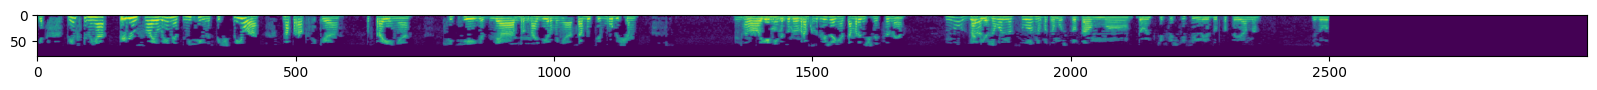

In [ ]:
import matplotlib.pyplot as plt

# выведем log-Mel спектрограмму на экран
plt.figure(figsize=(20,10))
plt.imshow(mel.cpu())
plt.show()

In [ ]:
# полученный словарь со значениями уверенности всех языков модели
probs

{'lo': 3.3762587463570526e-06,
 'kk': 8.437970791419502e-06,
 'mt': 3.073440097978164e-07,
 'bg': 1.740568950481247e-05,
 'km': 8.089940820354968e-05,
 'fi': 2.5237128284061328e-05,
 'sn': 5.875109854969196e-05,
 'ne': 2.2934770527172077e-07,
 'pa': 7.454472665813228e-07,
 'bs': 6.548887995450059e-06,
 'it': 3.660540096461773e-05,
 'mr': 7.59483569368058e-08,
 'si': 1.1519345207489096e-05,
 'br': 1.7277767256018706e-05,
 'ru': 0.9548795223236084,
 'sw': 1.933380872287671e-06,
 'ca': 4.182248630968388e-06,
 'yo': 1.127905306930188e-06,
 'la': 0.0004458978946786374,
 'tr': 0.00049025152111426,
 'zh': 0.00024186650989577174,
 'sv': 7.728882337687537e-05,
 'uk': 0.011633439920842648,
 'so': 5.0420656094729566e-08,
 'de': 0.00018094231199938804,
 'lb': 8.985946209350004e-09,
 'sd': 4.4008578470311477e-07,
 'no': 3.09505921904929e-05,
 'el': 7.133882900234312e-05,
 'nn': 0.0014923244016245008,
 'bn': 1.22260166790511e-06,
 'uz': 4.71644900912338e-09,
 'oc': 2.730873347900342e-06,
 'he': 3.11

## Использование Whisper по API

Для использования Whisper по API необходимо иметь аккаунт openai и секретный токен OPENAI_API_KEY (это тот же токен, который используется для взаимодействия с chatgpt по API).

In [ ]:
# установка библиотек
!pip install --upgrade openai

In [ ]:
import openai
import getpass
import os

# передаем секретный апи токен
openai_key = getpass.getpass("OpenAI API Key:")
os.environ["OPENAI_API_KEY"] = openai_key
openai.api_key = openai_key

OpenAI API Key:··········


В API Whisper можно подавать файлы размером не более 25 МБ, формата `.mp3`, `.mp4`, `.mpeg`, `.mpga`, `.m4a`, `.wav`, и `.webm`.

### Базовое применение

In [ ]:
from openai import OpenAI

# создаем экземпляр класса OpenAI
client = OpenAI()

# выполняем чтение файла
audio_file= open("/content/drive/MyDrive/audio/manager.mp3", "rb")

# выполняем транскрибацию
transcript = client.audio.transcriptions.create(model="whisper-1",
                                                file=audio_file)

transcript.text

'Меня в свое время это не сильно впечатлило на практике построения сетей для прогнозирования событий в будущем. Я имею ввиду в рамках заграждения рыночной цены. Да, довольно сложно, потому что там довольно-таки скачки сильные идут постоянно.'

### Транскрибация + перевод

In [ ]:
# создаем экземпляр класса OpenAI
client = OpenAI()

# выполняем чтение файла
audio_file= open("/content/drive/MyDrive/audio/manager.mp3", "rb")

# выполняем транскрибацию + перевод на английский язык
transcript = client.audio.translations.create(model="whisper-1",
                                                file=audio_file)

transcript.text

"In fact, it didn't impress me much at the time, in practice, building networks for forecasting events in the future, I mean, within the framework of the promotion of the market price. Well, yes, it's quite difficult, because there are quite strong jumps, it's hard to predict."

### Использование prompt

Подсказки (prompt) могут быть очень полезны для исправления специфических слов, аббревиатур, пунктуации, указания стиля письма  и тд.

In [ ]:
# создаем экземпляр класса OpenAI
client = OpenAI()

# открываем файл в режиме "rb"
audio_file= open("/content/drive/MyDrive/audio/manager.mp3", "rb")

# выполняем транскрибацию с параметром prompt
transcript = client.audio.transcriptions.create(model="whisper-1",
                                                file=audio_file,
                                                prompt='в рамках движения')

transcript.text

'В принципе, меня в свое время это не сильно впечатлило на практике построения сетей для прогнозирования событий в будущем. Я имею ввиду в рамках движения там рыночные цены. Ну да, довольно сложно, потому что там довольно-таки скачки сильные идут постоянно.'

Ссылка на некоторые примеры использования prompt:

https://cookbook.openai.com/examples/whisper_prompting_guide

# Tinkoff VoiceKit

Для использования сервиса Tinkoff VoiceKit необходима предварительная регистрация на платформе https://software.tinkoff.ru/auth/login/

После регистрации на Вашем балансе будет 1000 рублей, на которые Вы можете безвозмездно использовать сервис.

После регистрации Вам необходимо создать и сохранить 2 ключа API-key и SECRET-key. API_KEY можно сгенерировать в личном кабинете в разделе VoiceKit в любой момент времени. SECRET_KEY генерируется автоматически только при получении первого API_KEY, потом SECRET_KEY будет недоступен, поэтому крайне ВАЖНО сразу его сохранить.

In [ ]:
# установка библиотек
!pip install tinkoff-voicekit-client protobuf==3.20.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of grpcio-tools to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 103.6 MB/s eta 0:00:00
     

In [ ]:
import getpass

# передаем API_KEY
API_KEY = getpass.getpass("Tinkoff API Key:")

Tinkoff API Key:··········


In [ ]:
# передаем SECRET_KEY
SECRET_KEY = getpass.getpass("Tinkoff SECRET Key:")

Tinkoff SECRET Key:··········


## Метод **Recognize**

Используется для распознавания аудиофайлов разных форматов (mp3, wav, s16)

Для транскрибации текста, любой метод принимает словарь параметров:

    audio_config = {"encoding": "MPEG_AUDIO",  
                    "sample_rate_hertz": 16000,
                    "num_channels": 2}

    "encoding" - кодировка, может быть: 'LINEAR16', 'ALAW', 'MULAW', 'LINEAR32F', 'RAW_OPUS', 'MPEG_AUDIO';

    "sample_rate_hertz" - частота дискретизации записи;

    "num_channels" - количество каналов записи (1 или 2).


In [ ]:
from tinkoff_voicekit_client import ClientSTT
from pprint import pprint

# создаем клиент, передаем ключи
client = ClientSTT(API_KEY, SECRET_KEY)

# указываем параметры аудио
audio_config = {
    "encoding": "MPEG_AUDIO",
    "sample_rate_hertz": 16000,
    "num_channels": 2,
    }

# вызываем метод recognize
response = client.recognize("/content/drive/MyDrive/audio/manager.mp3",
                            audio_config)
pprint(response)

{'results': [{'alternatives': [{'confidence': -8.943222,
                                'transcript': 'в принципе меня',
                                'words': [{'confidence': 0.0,
                                           'end_time': '0.630s',
                                           'start_time': '0.600s',
                                           'word': 'в'},
                                          {'confidence': 0.0,
                                           'end_time': '0.990s',
                                           'start_time': '0.690s',
                                           'word': 'принципе'},
                                          {'confidence': 0.0,
                                           'end_time': '1.290s',
                                           'start_time': '1.170s',
                                           'word': 'меня'}]}],
              'channel': 1,
              'end_time': '1.290s',
              'start_time': '0.150s'},
         

## Метод **StreamingRecognize**

Используется для распознавания речи в реальном времени: телефонных звонков, голосовых ассистентов и т.п. Этот метод содержит много разных фильтров и опций.

In [ ]:
# установка библиотеки ffmpeg-python
!pip install ffmpeg-python

In [ ]:
# создаем клиент, передаем ключи
client = ClientSTT(API_KEY, SECRET_KEY)

# указываем параметры аудио
audio_config = {
    "encoding": "MPEG_AUDIO",
    "sample_rate_hertz": 16000,
    "num_channels": 2,
}

# указываем параметры аудио
stream_config = {"config": audio_config}

# вызываем метод streaming_recognize
with open("/content/drive/MyDrive/audio/manager.mp3", "rb") as source:
    responses = client.streaming_recognize(source, stream_config)
    for response in responses:
        pprint(response)

{'results': [{'is_final': True,
              'recognition_result': {'alternatives': [{'confidence': -3.5651412,
                                                       'transcript': 'угу',
                                                       'words': [{'confidence': 0.0,
                                                                  'end_time': '9.720s',
                                                                  'start_time': '9.660s',
                                                                  'word': 'угу'}]}],
                                     'channel': 0,
                                     'end_time': '9.720s',
                                     'start_time': '9.600s'},
              'stability': 0.0}]}
{'results': [{'is_final': True,
              'recognition_result': {'alternatives': [{'confidence': -36.55732,
                                                       'transcript': 'в '
                                                                     'п

Метод StreamingRecognize позволяет использовать дополнительные опции в словаре параметров. Вот некоторые из них:

    audio_config = {"max_alternatives": 1,  
                    "vad_config": {},
                    "enable_automatic_punctuation": False,
                    "profanity_filter": False,
                    "enable_denormalization": False}

    "max_alternatives" - количество альтернатив распознанного текста, [1,15];

    "vad_config" - настройки для обнаружения голосовой активности;

    "enable_automatic_punctuation" - пунктуация;

    "profanity_filter" - фильтр ненормативной лексики;

    "enable_denormalization" - преобразование текста в числовые данные (время, дата и тп);

    ""

### Добавляем несколько альтернативных вариантов транскрибации текста

In [ ]:
# создаем клиент, передаем ключи
client = ClientSTT(API_KEY, SECRET_KEY)

# указываем параметры аудио
audio_config = {
    "encoding": "MPEG_AUDIO",   # кодировка
    "sample_rate_hertz": 16000, # частота
    "num_channels": 2,          # количество каналов
    "max_alternatives": 3       # количество альтернатив
}

# указываем параметры аудио
stream_config = {"config": audio_config}

# вызываем метод streaming_recognize
with open("/content/drive/MyDrive/audio/manager.mp3", "rb") as source:
    responses = client.streaming_recognize(source, stream_config)
    for response in responses:
        pprint(response)

{'results': [{'is_final': True,
              'recognition_result': {'alternatives': [{'confidence': -3.571104,
                                                       'transcript': 'угу',
                                                       'words': [{'confidence': 0.0,
                                                                  'end_time': '9.720s',
                                                                  'start_time': '9.660s',
                                                                  'word': 'угу'}]},
                                                      {'confidence': -4.914212,
                                                       'transcript': 'угу',
                                                       'words': [{'confidence': 0.0,
                                                                  'end_time': '9.720s',
                                                                  'start_time': '9.660s',
                                              

### Добавляем vad_config

In [ ]:
# создаем клиент, передаем ключи
client = ClientSTT(API_KEY, SECRET_KEY)

# указываем параметры vad (voice activity detection)
vad_config = {"silence_duration_threshold": 3,
              "silence_prob_threshold": 0.5}

# указываем параметры аудио
audio_config = {
    "encoding": "MPEG_AUDIO",   # кодировка
    "sample_rate_hertz": 16000, # частота
    "num_channels": 2,          # количество каналов
    "vad_config": vad_config    # vad параметры
}

# указываем параметры аудио
stream_config = {"config": audio_config}

# вызываем метод streaming_recognize
with open("/content/drive/MyDrive/audio/manager.mp3", "rb") as source:
    responses = client.streaming_recognize(source, stream_config)
    for response in responses:
        pprint(response)

{'results': [{'is_final': True,
              'recognition_result': {'alternatives': [{'confidence': -3.5709088,
                                                       'transcript': 'угу',
                                                       'words': [{'confidence': 0.0,
                                                                  'end_time': '9.720s',
                                                                  'start_time': '9.660s',
                                                                  'word': 'угу'}]}],
                                     'channel': 0,
                                     'end_time': '9.720s',
                                     'start_time': '9.600s'},
              'stability': 0.0}]}
{'results': [{'is_final': True,
              'recognition_result': {'alternatives': [{'confidence': -36.52153,
                                                       'transcript': 'в '
                                                                     'п

### Включаем пунктуацию

In [ ]:
# создаем клиент, передаем ключи
client = ClientSTT(API_KEY, SECRET_KEY)

# указываем параметры аудио
audio_config = {
    "encoding": "MPEG_AUDIO",             # кодировка
    "sample_rate_hertz": 16000,           # частота
    "num_channels": 2,                    # количество каналов
    "enable_automatic_punctuation": True  # включаем пунктуацию
}

# указываем параметры аудио
stream_config = {"config": audio_config}

# вызываем метод streaming_recognize
with open("/content/drive/MyDrive/audio/manager.mp3", "rb") as source:
    responses = client.streaming_recognize(source, stream_config)
    for response in responses:
        pprint(response)

{'results': [{'is_final': True,
              'recognition_result': {'alternatives': [{'confidence': -3.5701795,
                                                       'transcript': 'Угу.',
                                                       'words': [{'confidence': 0.0,
                                                                  'end_time': '9.720s',
                                                                  'start_time': '9.660s',
                                                                  'word': 'угу'}]}],
                                     'channel': 0,
                                     'end_time': '9.720s',
                                     'start_time': '9.600s'},
              'stability': 0.0}]}
{'results': [{'is_final': True,
              'recognition_result': {'alternatives': [{'confidence': -36.524643,
                                                       'transcript': 'В '
                                                                     

### Фильтр ненормативной лексики

Фильтр выключен

In [ ]:
# создаем клиент, передаем ключи
client = ClientSTT(API_KEY, SECRET_KEY)

# указываем параметры аудио
audio_config = {
    "encoding": "LINEAR16",      # кодировка
    "sample_rate_hertz": 8000,   # частота
    "num_channels": 1,           # количество каналов
    "profanity_filter": False    # фильтр ненормативной лексики
}

# указываем параметры аудио
stream_config = {"config": audio_config}

# вызываем метод streaming_recognize
with open("/content/drive/MyDrive/audio/negative_sample.s16", "rb") as source:
    responses = client.streaming_recognize(source, stream_config)
    for response in responses:
        pprint(response)

{'results': [{'is_final': True,
              'recognition_result': {'alternatives': [{'confidence': -97.01226,
                                                       'transcript': 'воруйте '
                                                                     'блядь я '
                                                                     'имею '
                                                                     'виду '
                                                                     'блядь '
                                                                     'эти '
                                                                     'карты '
                                                                     'блядь '
                                                                     'хакеров '
                                                                     'там '
                                                                     'обвиняйте '
                          

Фильтр включен

In [ ]:
# создаем клиент, передаем ключи
client = ClientSTT(API_KEY, SECRET_KEY)

# указываем параметры аудио
audio_config = {
    "encoding": "LINEAR16",      # кодировка
    "sample_rate_hertz": 8000,   # частота
    "num_channels": 1,           # количество каналов
    "profanity_filter": True     # фильтр ненормативной лексики
}

# указываем параметры аудио
stream_config = {"config": audio_config}

# вызываем метод streaming_recognize
with open("/content/drive/MyDrive/audio/negative_sample.s16", "rb") as source:
    responses = client.streaming_recognize(source, stream_config)
    for response in responses:
        pprint(response)

{'results': [{'is_final': True,
              'recognition_result': {'alternatives': [{'confidence': -97.0132,
                                                       'transcript': 'воруйте '
                                                                     'б**** я '
                                                                     'имею '
                                                                     'виду '
                                                                     'б**** '
                                                                     'эти '
                                                                     'карты '
                                                                     'б**** '
                                                                     'хакеров '
                                                                     'там '
                                                                     'обвиняйте '
                           

### Преобразование текста в числа

In [ ]:
# создаем клиент, передаем ключи
client = ClientSTT(API_KEY, SECRET_KEY)

# указываем параметры аудио
audio_config = {
    "encoding": "MPEG_AUDIO",        # кодировка
    "sample_rate_hertz": 48000,      # частота
    "num_channels": 1,               # количество каналов
    "enable_denormalization": True   # текстовые числа
}

# указываем параметры аудио
stream_config = {"config": audio_config}

# вызываем метод streaming_recognize
with open("/content/drive/MyDrive/audio/obratnyiy-otschet.mp3", "rb") as source:
    responses = client.streaming_recognize(source, stream_config)
    for response in responses:
        pprint(response)

{'results': [{'is_final': True,
              'recognition_result': {'alternatives': [{'confidence': -6.4621787,
                                                       'transcript': '109876',
                                                       'words': [{'confidence': 0.0,
                                                                  'end_time': '0.960s',
                                                                  'start_time': '0.660s',
                                                                  'word': 'десять'},
                                                                 {'confidence': 0.0,
                                                                  'end_time': '2.340s',
                                                                  'start_time': '2.070s',
                                                                  'word': 'девять'},
                                                                 {'confidence': 0.0,
                           